# Students Project 2023/24

## Workproject Clustering Validation



## 1. Define the paths and args 
Set the arguments and paths to execute the pipeline.

In [1]:
## Arguments

# subset PCA
start = 1
n_pcs = 20

# n_neighbors
n_neighbors=15
method='umap'
metric='euclidean'

# UMAP
spread=2.5
min_dist=0.1

# tSNE
perplexity=40

# Plot embedding
color='total_counts'

# Feel free to extent this with arguments needed downstream

# Filepaths:

h5ad_path = "/mnt/workspace_stud/mbentse/catlas_objects/esophagus_muscularis_SM-A8CPH.h5ad"
#h5ad_path = "/mnt/workspace_stud/mbentse/catlas_objects/heart_lv_SM-IOBHO.h5ad"

## 2. Imports

In [2]:
# Import packages
import episcanpy as epi
import scanpy as sc

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## 3. Read h5ad files and build anndata objects

In [3]:
adata = epi.read_h5ad(h5ad_path)

## 4. Inspect files

### 4.1 .obs table

In [4]:
adata.obs

""
index
esophagus_muscularis_SM-A8CPH_1+AAGCTATACCGCTTCTCACAAG
esophagus_muscularis_SM-A8CPH_1+AATTCGGATGAAATGCTACGGG
esophagus_muscularis_SM-A8CPH_1+ACTGCACAGAGTCCAGATTTCC
esophagus_muscularis_SM-A8CPH_1+AGGTCACTGAGCTTACAATCGT
esophagus_muscularis_SM-A8CPH_1+AGTCGGAACGCCCAAGATCGAC
...
esophagus_muscularis_SM-A8CPH_1+CCATCTGGCATGCGATCGTTAG
esophagus_muscularis_SM-A8CPH_1+TTATGGATGCAAAGGATCGGCT
esophagus_muscularis_SM-A8CPH_1+ACGTGTTGGTGAGTGTGGCATA


### 4.2 .var table

In [5]:
adata.var

""
index
chr1:9955-10355
chr1:29163-29563
chr1:79215-79615
chr1:102755-103155
chr1:180580-180980
...
chrY:56676947-56677347
chrY:56677442-56677842
chrY:56678029-56678429


In [6]:
adata.X

<10997x1154611 sparse matrix of type '<class 'numpy.float32'>'
	with 35591247 stored elements in Compressed Sparse Row format>

## 5. Add metrics

In [7]:
# compute metrics
sc.pp.calculate_qc_metrics(adata=adata, percent_top=None, inplace=True)

In [8]:
adata.obs

,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts
index,,,,
esophagus_muscularis_SM-A8CPH_1+AAGCTATACCGCTTCTCACAAG,6264,8.742734,10835.0,9.290629
esophagus_muscularis_SM-A8CPH_1+AATTCGGATGAAATGCTACGGG,827,6.719013,1365.0,7.219642
esophagus_muscularis_SM-A8CPH_1+ACTGCACAGAGTCCAGATTTCC,2334,7.755767,4000.0,8.294300
esophagus_muscularis_SM-A8CPH_1+AGGTCACTGAGCTTACAATCGT,768,6.645091,1181.0,7.074963
esophagus_muscularis_SM-A8CPH_1+AGTCGGAACGCCCAAGATCGAC,2940,7.986505,4891.0,8.495357
...,...,...,...,...
esophagus_muscularis_SM-A8CPH_1+CCATCTGGCATGCGATCGTTAG,1612,7.385851,2685.0,7.895808
esophagus_muscularis_SM-A8CPH_1+TTATGGATGCAAAGGATCGGCT,539,6.291569,888.0,6.790097
esophagus_muscularis_SM-A8CPH_1+ACGTGTTGGTGAGTGTGGCATA,1005,6.913737,1593.0,7.374002


## 6. Normalize adata

In [9]:
sc.pp.normalize_total(adata, exclude_highly_expressed=False, target_sum=None)
sc.pp.log1p(adata)

## 7. Dimension Reduction PCA
### 7.1 Compute PCA

In [10]:
#epi.pp.binarize(adata_cCRE)
sc.pp.pca(adata, use_highly_variable=False)

### 7.2 Plot PCA

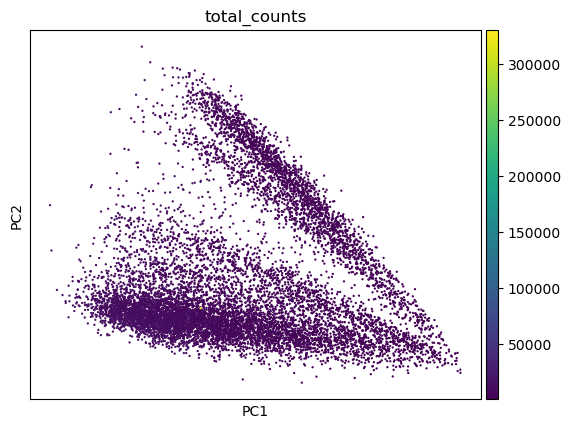

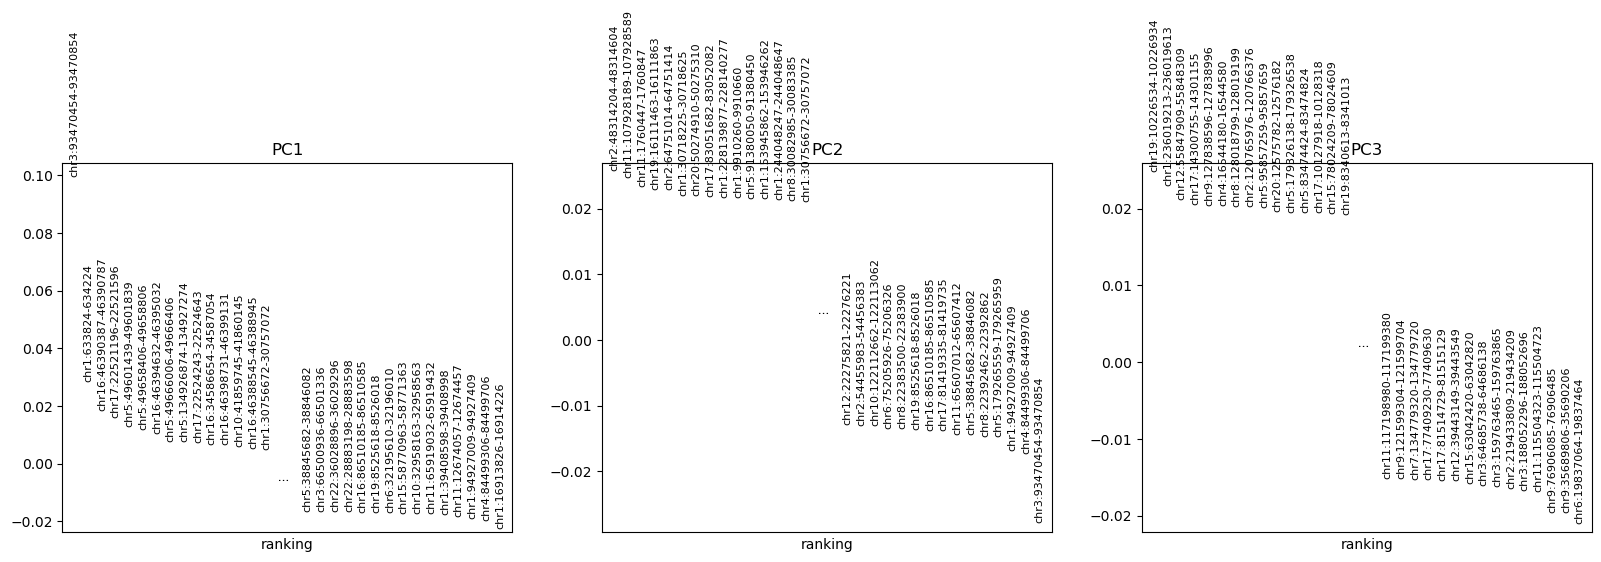

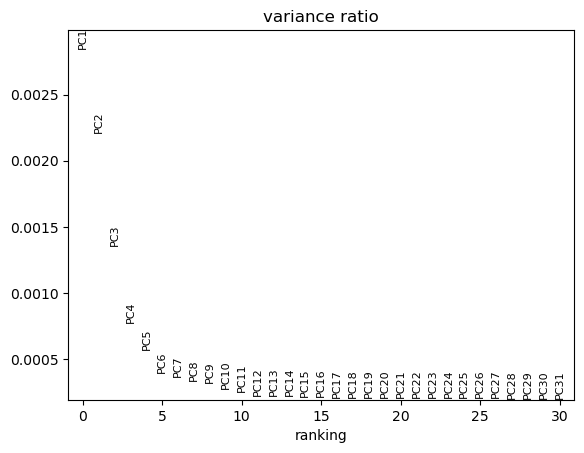

In [11]:
sc.pl.pca_overview(adata, color="total_counts")

### 7.3 Subset PCA

In [12]:
adata.obsm["X_pca"] = adata.obsm["X_pca"][:, start:n_pcs]
adata.varm["PCs"] = adata.varm["PCs"][:, start:n_pcs]

if "variance_ratio" in adata.uns.get("pca", {}):
    adata.uns["pca"]["variance_ratio"] = adata.uns["pca"]["variance_ratio"][start:n_pcs]

## 8. Embedding

### 8.1 UMAP 
#### 8.1.1 Compute the neighborhood using UMAP

In [13]:
sc.pp.neighbors(adata, n_neighbors=n_neighbors, method=method, metric=metric)

#### 8.1.2 perform umap embedding

In [14]:
sc.tl.umap(adata, spread=spread, min_dist=min_dist)

<Axes: title={'center': 'total_counts'}, xlabel='UMAP1', ylabel='UMAP2'>

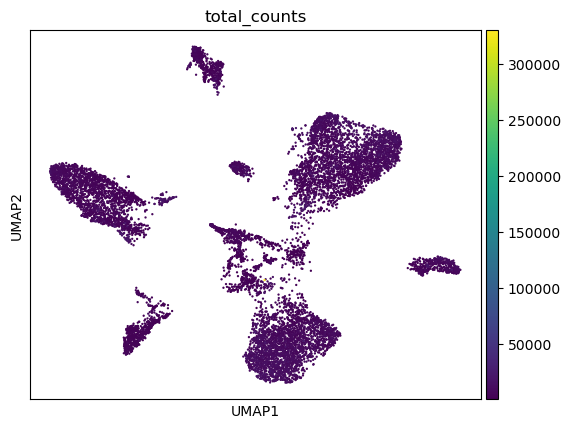

In [15]:
sc.pl.embedding(adata, basis='umap', ncols=3, show=False, color=color)

### 8.2 TSNE

In [16]:
sc.tl.tsne(adata, perplexity=perplexity)

<Axes: title={'center': 'total_counts'}, xlabel='tSNE1', ylabel='tSNE2'>

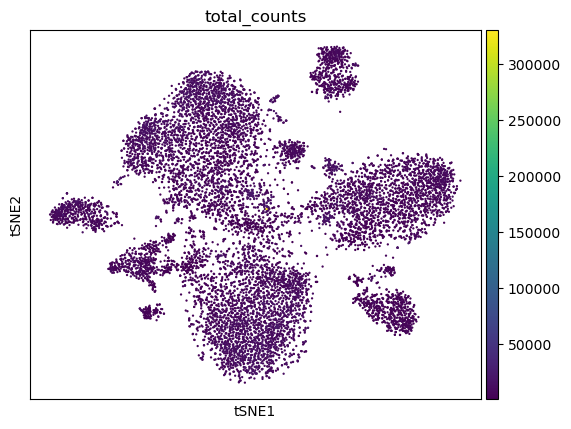

In [17]:
sc.pl.embedding(adata, basis='tsne', ncols=3, show=False, color="total_counts")

## 9 Clustering

In [18]:
adata.obs['total_counts']

index
esophagus_muscularis_SM-A8CPH_1+AAGCTATACCGCTTCTCACAAG    10835.0
esophagus_muscularis_SM-A8CPH_1+AATTCGGATGAAATGCTACGGG     1365.0
esophagus_muscularis_SM-A8CPH_1+ACTGCACAGAGTCCAGATTTCC     4000.0
esophagus_muscularis_SM-A8CPH_1+AGGTCACTGAGCTTACAATCGT     1181.0
esophagus_muscularis_SM-A8CPH_1+AGTCGGAACGCCCAAGATCGAC     4891.0
                                                           ...   
esophagus_muscularis_SM-A8CPH_1+CCATCTGGCATGCGATCGTTAG     2685.0
esophagus_muscularis_SM-A8CPH_1+TTATGGATGCAAAGGATCGGCT      888.0
esophagus_muscularis_SM-A8CPH_1+ACGTGTTGGTGAGTGTGGCATA     1593.0
esophagus_muscularis_SM-A8CPH_1+GGCACGAACAATACTAAGCGCT     1920.0
esophagus_muscularis_SM-A8CPH_1+GGCACGAACAGTGTCATGAAAG     2411.0
Name: total_counts, Length: 10997, dtype: float32

### 9.1 Louvain 

In [21]:
louvain_tag = 'test_louvain_23.11'
sc.tl.louvain(adata, key_added=louvain_tag)
# del adata.obs['louvain']

<Axes: title={'center': 'test_louvain_23.11'}, xlabel='tSNE1', ylabel='tSNE2'>

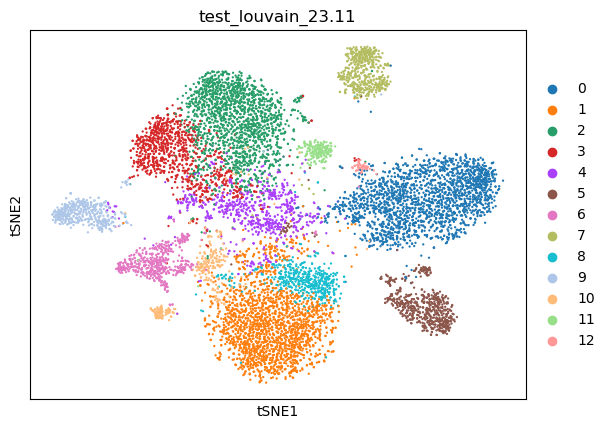

In [23]:
sc.pl.embedding(adata, basis='tsne', ncols=3, show=False, color=louvain_tag)

In [24]:
# Docu: 'Function will test different settings of louvain to obtain the target number of clusters.' 
epi.tl.getNClusters(adata, n_cluster=13)

step 0
got 16 at resolution 1.5
step 1
got 10 at resolution 0.75
step 2
got 13 at resolution 1.125


### 9.2 Leiden


In [25]:
leiden_tag = 'test_leiden_26.11'
sc.tl.leiden(adata, key_added=leiden_tag)

<Axes: title={'center': 'test_leiden_26.11'}, xlabel='tSNE1', ylabel='tSNE2'>

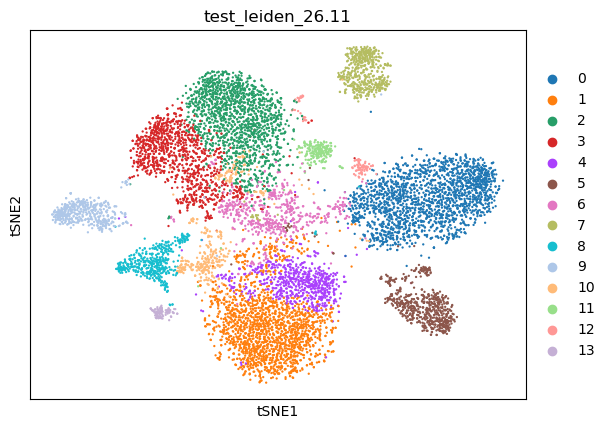

In [26]:
sc.pl.embedding(adata, basis='tsne', ncols=3, show=False, color=leiden_tag)

In [27]:
epi.tl.getNClusters(adata, n_cluster=13, method='leiden')

step 0
got 20 at resolution 1.5
step 1
got 12 at resolution 0.75
step 2
got 16 at resolution 1.125
step 3
got 14 at resolution 0.9375
step 4
got 13 at resolution 0.84375


### 9.3 k-means 

In [28]:
epi.tl.kmeans(adata, num_clusters=13)

<Axes: title={'center': 'kmeans'}, xlabel='tSNE1', ylabel='tSNE2'>

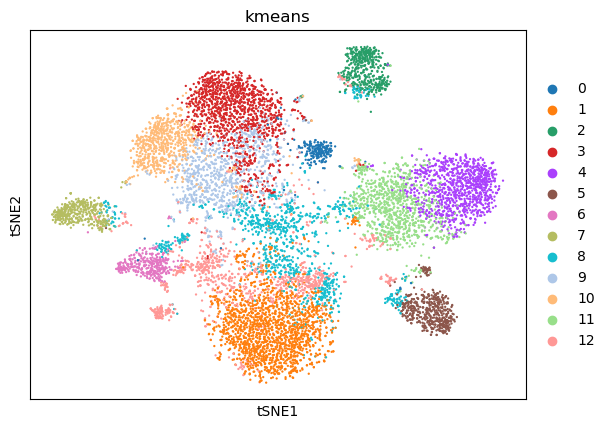

In [29]:
sc.pl.embedding(adata, basis='tsne', ncols=3, show=False, color='kmeans')

### 9.4 Visual comparision


[<Axes: title={'center': 'test_louvain_23.11'}, xlabel='tSNE1', ylabel='tSNE2'>,
 <Axes: title={'center': 'test_leiden_26.11'}, xlabel='tSNE1', ylabel='tSNE2'>,
 <Axes: title={'center': 'kmeans'}, xlabel='tSNE1', ylabel='tSNE2'>]

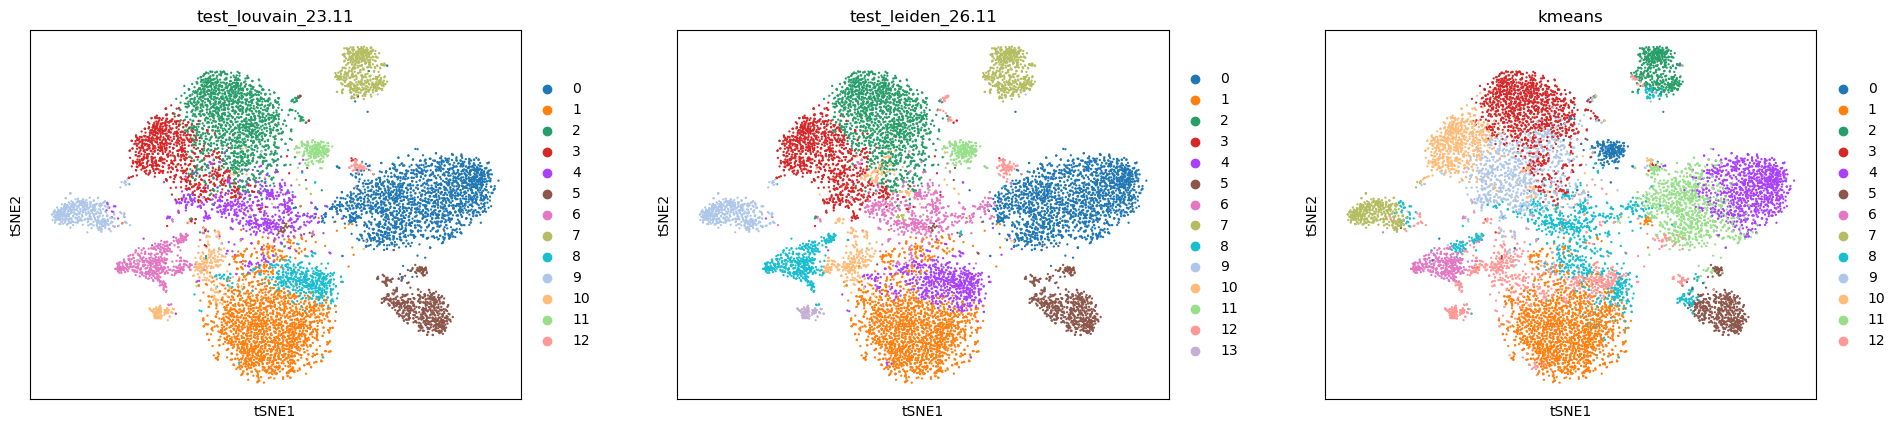

In [30]:
sc.pl.embedding(adata, basis='tsne', ncols=3, show=False, color=[louvain_tag, leiden_tag, 'kmeans'], wspace=0.2)

In [31]:
# (Kind of) Differences between Leiden and Louvain
# [Not really, since cluster 3 could be the same as cluster 2 in two different methods, just differently called. and 2!=3]
len( [ 1 for i,j in zip(adata.obs[louvain_tag],adata.obs[leiden_tag]) if i!=j ] )

2551

## 10 Clustering comparision and evaluation

AnnData object with n_obs × n_vars = 10997 × 1154611
    obs: 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'test_louvain_23.11', 'louvain', 'test_leiden_26.11', 'leiden', 'kmeans'
    var: 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'
    uns: 'log1p', 'pca', 'neighbors', 'umap', 'tsne', 'louvain', 'test_louvain_23.11_colors', 'leiden', 'test_leiden_26.11_colors', 'kmeans_colors'
    obsm: 'X_pca', 'X_umap', 'X_tsne'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

### 10.1 ARI (Ajusted Rand Index)

In [ ]:
#print('louvain:\t', epi.tl.ARI(adata, 'test_louvain_23.11', 'index'))
#print('kmeans:\t', epi.tl.ARI(adata, 'kmeans', 'index'))